In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data.csv")

In [5]:
data.head()

,Unnamed: 0,Survived,Pclass,Age,cat_male,cat_Q,cat_S,cat_Miss,cat_Mr,cat_Mrs,cat_Other,cat_big,cat_small
0,0,0,-1,22.0,1,0,1,0,1,0,0,0,1
1,1,1,1,38.0,0,0,0,0,0,1,0,0,1
2,2,1,-1,26.0,0,0,1,1,0,0,0,0,0
3,3,1,1,35.0,0,0,1,0,0,1,0,0,1
4,4,0,-1,35.0,1,0,1,0,1,0,0,0,0


In [7]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [8]:
data

,Survived,Pclass,Age,cat_male,cat_Q,cat_S,cat_Miss,cat_Mr,cat_Mrs,cat_Other,cat_big,cat_small
0,0,-1,22.0,1,0,1,0,1,0,0,0,1
1,1,1,38.0,0,0,0,0,0,1,0,0,1
2,1,-1,26.0,0,0,1,1,0,0,0,0,0
3,1,1,35.0,0,0,1,0,0,1,0,0,1
4,0,-1,35.0,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,27.0,1,0,1,0,0,0,1,0,0
887,1,1,19.0,0,0,1,1,0,0,0,0,0
888,0,-1,18.0,0,0,1,1,0,0,0,0,1
889,1,1,26.0,1,0,0,0,1,0,0,0,0


In [16]:
X = data.iloc[:, [1,2,3,4,5,6,7,8,9,10,11]].values
y = data.iloc[:, 0].values

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
DT_model=DecisionTreeClassifier() 
DT_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [20]:
y_pred=DT_model.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[98 12]
 [23 46]]


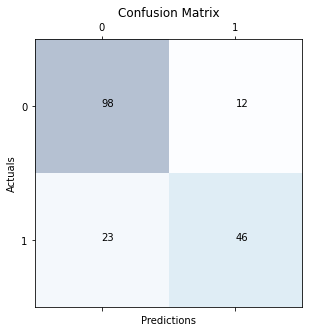

In [22]:
plt.matshow(cf_matrix, cmap=plt.cm.Blues, alpha=0.3)

plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')


for i in range(cf_matrix.shape[0]):
    for j in range(cf_matrix.shape[1]):
        plt.text(x=j, y=i,s=cf_matrix[i, j])

In [23]:
from sklearn import metrics

y_pred = DT_model.predict(X_test)

accracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print (f'Decision Tree model Accuracy: {100*accracy:.3} %')
print (f'Decision Tree model f1_score: {100*f1_score:.3} %')
print (f'Decision Tree model precision: {100*precision:.3} %')
print (f'Decision Tree model recall: {100*recall:.3}  %')

Decision Tree model Accuracy: 80.4 %
Decision Tree model f1_score: 72.4 %
Decision Tree model precision: 79.3 %
Decision Tree model recall: 66.7  %


In [ ]:
plt.subplots(figsize=(8,8))
features = X.columns
importances = DT_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Random Forest

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [28]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier() 
RF_model.fit(X_train,y_train)

RandomForestClassifier()

In [29]:
y_pred=RF_model.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[95 15]
 [18 51]]


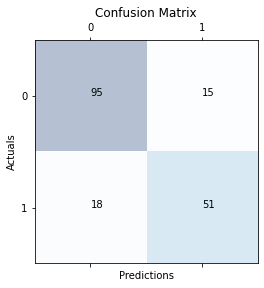

In [31]:
plt.matshow(cf_matrix, cmap=plt.cm.Blues, alpha=0.3)

plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')


for i in range(cf_matrix.shape[0]):
    for j in range(cf_matrix.shape[1]):
        plt.text(x=j, y=i,s=cf_matrix[i, j])

In [32]:
from sklearn import metrics

y_pred = RF_model.predict(X_test)

accracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print (f'Random Forest model Accuracy: {100*accracy:.3} %')
print (f'Random Forest model f1_score: {100*f1_score:.3} %')
print (f'Random Forest model precision: {100*precision:.3} %')
print (f'Random Forest model recall: {100*recall:.3}  %')

Random Forest model Accuracy: 81.6 %
Random Forest model f1_score: 75.6 %
Random Forest model precision: 77.3 %
Random Forest model recall: 73.9  %


In [ ]:
plt.subplots(figsize=(8,8))
features = X.columns
importances = RF_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()